In [ ]:
#compare with reshaped data and original data

In [4]:
#モジュールのインポート
# [1]
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap,LinearSegmentedColormap


#自分で好きなカラーパレットを作成
#気象庁ぽいカラー
#白→青系→黄色→赤系

#色をRGBで指定してリストに入れる0~1に正規化するため255で割る
jmacolors = [
    (242,242,242,1),#white
    (160,210,255,1),
    (33 ,140,255,1),
    (0  ,65 ,255,1),
    (250,245,0,1),
    (255,153,0,1),
    (255,40,0,1),
    (180,0,104,1)]

cmap = ListedColormap(jmacolors)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import datetime

# 定義
NX = 481
NY = 505

dt = datetime.datetime(2015,9,9,0,0)
print(dt.year)
print(dt.month)
print(dt.day)
print(dt.hour)
print(dt.minute)
date = f"{dt.year:04d}{dt.month:02d}{dt.day:02d}{dt.hour:02d}{dt.minute:02d}"
print(date)

file_path = f"/mnt/jet12/makoto/extract_senjo/ext_sun/dat/{dt.year:04d}/{dt.month:02d}/{dt.day:02d}/RA01_5000m_{dt.strftime('%Y%m%d%H%M')}.dat"
print(file_path)
#file_path = "/mnt/jet12/makoto/extract_senjo/ext_sun/dat/2020/07/03/RA01_5000m_202007030000.dat"
# 読み込み（ビッグエンディアン float32 を NY×NX 読み込む）
with open(file_path, 'rb') as f:
    data = f.read()
    values = struct.unpack(f'>{NX*NY}f', data)
    arr = np.array(values, dtype=np.float32).reshape((NY, NX))

new_lat = np.linspace(22.400, 47.600, NY)
new_lon = np.linspace(120.000, 150.000, NX)

2015
9
9
0
0
201509090000
/mnt/jet12/makoto/extract_senjo/ext_sun/dat/2015/09/09/RA01_5000m_201509090000.dat


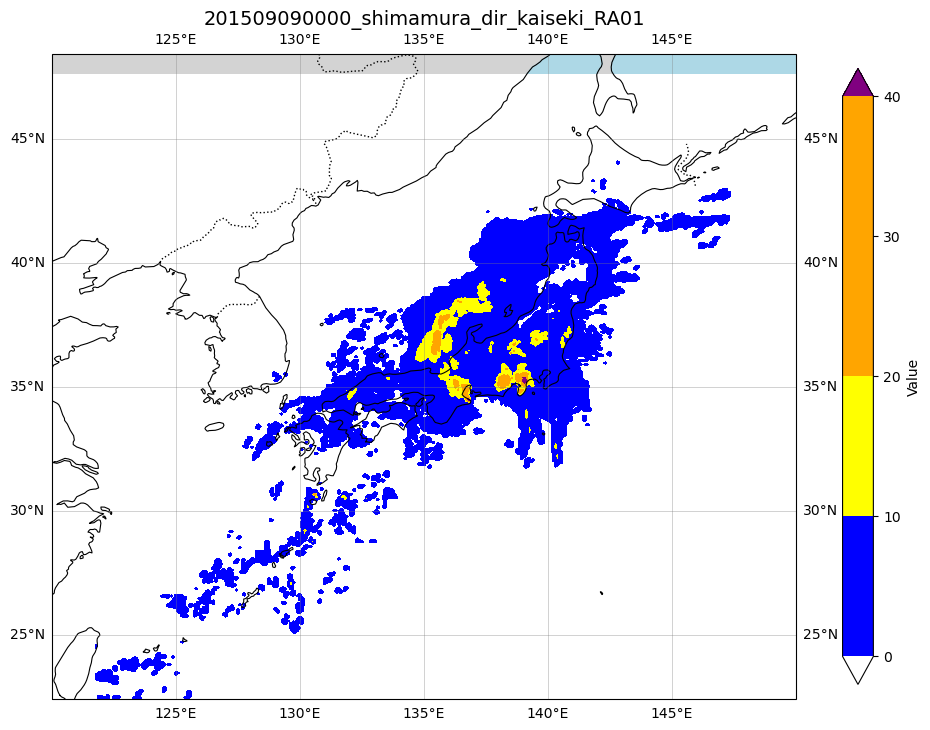

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# カスタムカラーマップを定義
#custom_colors = ['gray', 'blue', 'skyblue', 'yellow', 'green','purple' , 'red', ]
#cmap = ListedColormap(custom_colors)

# 等値線レベルを定義
#bounds = [-1,0,1, 10, 20, 40, 60, 1000]  # 1000 で「60以上」をカバー
#norm = BoundaryNorm(bounds, ncolors=len(custom_colors))

custom_colors = ['white', 'skyblue', 'blue', 'yellow', 'orange' , 'red', 'purple']
cmap = ListedColormap(custom_colors)

# 等値線レベルを定義
levels = np.arange(0,50,10)

# 緯度経度グリッド
lon2d, lat2d = np.meshgrid(new_lon, new_lat)

# 図と地図投影の設定（PlateCarree は経緯度そのまま）
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# 等値線塗り
np.clip(arr,0,None)
contour = ax.contourf(lon2d, lat2d, arr, levels=levels, cmap=cmap, norm=norm,extend='both', transform=ccrs.PlateCarree())

# 地図情報を追加
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.set_extent([120, 150, 22.4, 47.6])  # 日本周辺の範囲
#ax.set_extent([132, 143, 30, 42]) # touhoku

# 緯度経度線
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

# カラーバー
cbar = plt.colorbar(contour, ax=ax, ticks=levels, orientation='vertical', shrink=0.8, pad=0.05)
cbar.ax.set_ylabel('Value')

# タイトル
plt.title(f"{date}_shimamura_dir_kaiseki_RA01", fontsize=14)
plt.savefig(f"kaisheki_shimamuraidir_RA01_{date}.png", dpi=300, bbox_inches='tight')
plt.show()


In [40]:
import numpy as np

# バイナリを読み込み
data = np.fromfile("/mnt/jet12/makoto/RA/script_hirosaki/rain/RARain201509090000.bin", dtype=np.float32)

# グリッドサイズに reshape

NY = 3360
NX = 2560
data = data.reshape((3360, 2560)) # (Y, X) の順になるので注意
data = np.flipud(data)

# 必要に応じて表示や保存
#import matplotlib.pyplot as plt
#plt.imshow(data, origin='lower')
#plt.colorbar()
#plt.show()

new_lat = np.linspace(20.400, 48.600, NY)
new_lon = np.linspace(118.000, 150.000, NX)


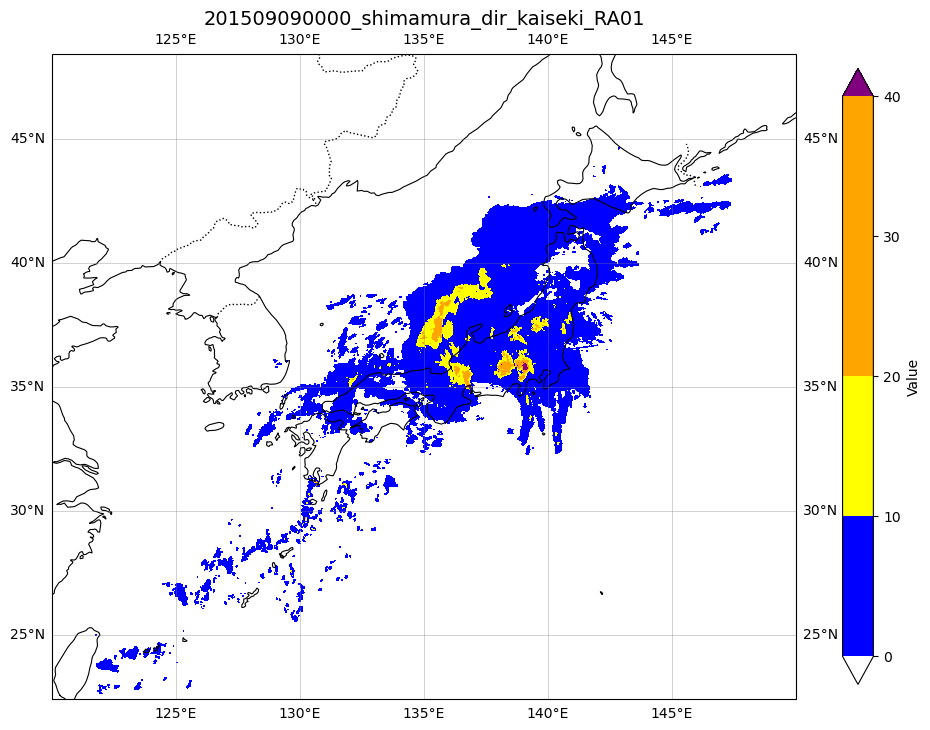

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# カスタムカラーマップを定義
#custom_colors = ['gray', 'blue', 'skyblue', 'yellow', 'green','purple' , 'red', ]
#cmap = ListedColormap(custom_colors)

# 等値線レベルを定義
#bounds = [-1,0,1, 10, 20, 40, 60, 1000]  # 1000 で「60以上」をカバー
#norm = BoundaryNorm(bounds, ncolors=len(custom_colors))

custom_colors = ['white', 'skyblue', 'blue', 'yellow', 'orange' , 'red', 'purple']
cmap = ListedColormap(custom_colors)

# 等値線レベルを定義
levels = np.arange(0,50,10)

# 緯度経度グリッド
lon2d, lat2d = np.meshgrid(new_lon, new_lat)

# 図と地図投影の設定（PlateCarree は経緯度そのまま）
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# 等値線塗り
np.clip(arr,0,None)
contour = ax.contourf(lon2d, lat2d, data, levels=levels, cmap=cmap, norm=norm,extend='both', transform=ccrs.PlateCarree())

# 地図情報を追加
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.set_extent([120, 150, 22.4, 47.6])  # 日本周辺の範囲
#ax.set_extent([132, 143, 30, 42]) # touhoku

# 緯度経度線
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

# カラーバー
cbar = plt.colorbar(contour, ax=ax, ticks=levels, orientation='vertical', shrink=0.8, pad=0.05)
cbar.ax.set_ylabel('Value')

# タイトル
plt.title(f"{date}_shimamura_dir_kaiseki_RA01", fontsize=14)
plt.savefig(f"kaisheki_shimamuraidir_RA01_{date}.png", dpi=300, bbox_inches='tight')
plt.show()
